In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv(r'C:\Users\Admin\resources\shopeep_koreantop_clothing_shop_data.csv',encoding = 'ISO-8859-1')
df.head()

,pk_shop,date_collected,shopid,name,join_month,join_day,join_year,item_count,follower_count,response_time,response_rate,shop_location,rating_bad,rating_good,rating_normal,rating_star,is_shopee_verified,is_official_shop
0,20210613254711738,2021-06-13,254711738,hello.may.ph,April,27,2020,446,17487,10:13:55,96,NaN,181,17510,729,4.81,1,0
1,20210613314198143,2021-06-13,314198143,love.women.shop,September,25,2020,263,8574,10:43:05,73,"San Nicolas,Metro Manila",78,2656,198,4.68,0,0
2,2021061310377223,2021-06-13,10377223,R&O RedOrange,September,27,2016,209,660417,08:32:07,90,"Pasay City,Metro Manila",4647,1071829,18073,4.91,1,0
3,2021061321407329,2021-06-13,21407329,patriciacai,April,30,2017,165,18787,09:10:38,94,"Binondo,Metro Manila",44,18959,215,4.94,1,0
4,2021061311187885,2021-06-13,11187885,Little Market Manila,October,18,2016,467,67371,11:40:59,89,"Caloocan City,Metro Manila",680,39252,2383,4.73,1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 746 entries, 0 to 745
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   pk_shop             746 non-null    int64  
 1   date_collected      746 non-null    object 
 2   shopid              746 non-null    int64  
 3   name                746 non-null    object 
 4   join_month          746 non-null    object 
 5   join_day            746 non-null    int64  
 6   join_year           746 non-null    int64  
 7   item_count          746 non-null    int64  
 8   follower_count      746 non-null    int64  
 9   response_time       746 non-null    object 
 10  response_rate       746 non-null    int64  
 11  shop_location       428 non-null    object 
 12  rating_bad          746 non-null    int64  
 13  rating_good         746 non-null    int64  
 14  rating_normal       746 non-null    int64  
 15  rating_star         740 non-null    float64
 16  is_shope

In [ ]:
#Lấy một cột theo tên cột

#Cách 1: dùng phương thức filter

df1 = df.filter(['shop_location'])
df1

In [ ]:
#Cách 2: truyền trực tiếp tên cột

df1 = df[['shop_location']]
df1

In [ ]:
#Lấy nhiều cột theo tên cột

#Cách 1: dùng phương thức filter

df2 = df.filter(['join_month', 'join_day','join_year'])
df2

In [ ]:
#Cách 2: truyền trực tiếp tên cột

df2 = df[['join_month', 'join_day','join_year']]
df2

In [ ]:
#Lấy thông tin các bản ghi theo chỉ số

#Cách 1: dùng phương thức filter, cho phép lấy các bản ghi rời rạc, các chỉ số được ngăn cách nhau bởi dấu phẩy.

df3 = df2.filter([0,1,2,3,4,5,6,7], axis=0)
df3

In [ ]:
#Cách 2: truyền chỉ số trực tiếp, cho phép lấy một hoặc nhiều bản ghi liên tiếp

df3 = df2[0:8]
df3

In [ ]:
#Lấy thông tin kết hợp theo hàng và cột

#Cách 1: dùng phương thức filter.

df4=df.filter(['pk_shop','rating_bad','rating_good'])[:8]
df4

In [ ]:
#Cách 2: truyền chỉ số 

df4=df[['pk_shop','rating_bad','rating_good']][:8]
df4

In [ ]:
#Lọc bản ghi theo điều kiện
#TH1: Lọc các bản ghi theo điều kiện đơn
df[df['join_month']=='April']

In [ ]:
#TH2: Lọc các bản ghi theo điều kiện phức
df[(df['join_year'] == 2021) & (df['follower_count'] >= 10000)]

In [ ]:
#TH3: Lọc các cột và các bản ghi theo điều kiện 
df[df['join_month']=='April'].filter(['response_time','response_rate'])

In [ ]:
df.query("(join_year == 2021) and (follower_count >= 10000)")

In [ ]:
df.groupby('name')['follower_count'].mean()

In [ ]:
df.groupby(['join_year','shop_location'])[['rating_bad','rating_good']].max()

In [ ]:
# Để đơn giản ta thực hiện lọc tập dữ liệu ban đầu theo các thuộc tính sau
df = df[['join_month', 'join_day','join_year','shop_location','rating_bad','rating_good','rating_normal']]
df

In [ ]:
# Tạo cột 'rating' tính điểm cho mỗi cửa hàng dựa vào thông tin các cột rating_bad, rating_good, rating_normal 
# theo công thức sau: rating = rating_good *2 + rating_normal - rating_bad*3

df['rating'] = df['rating_good'] * 2 + df['rating_normal'] - df['rating_bad'] * 3
df

In [ ]:
# ghép 3 cột join_month, join_day, join_year thành cột mới có tên 'date' nhận giá trị có dạng: "join_month join_day,join_year"

df['date'] = df['join_month'] + " " + df['join_day'].astype(str) + "," + df['join_year'].astype(str)
df

In [ ]:
# Thêm cột new có giá trị True nếu join_year = 2021 và False trong trường hợp còn lại.
df['new'] = df['join_year'] == 2021 
df

In [ ]:
# Nếu có 2 lựa chọn ta sử dụng np.where
# Thêm cột rate có giá trị good nếu rating_good >= 50000,  bad trong trường hợp còn lại
df['rate'] = np.where(df['rating_good'] >= 50000,'good','bad' )
df

In [ ]:
# Nếu có nhiều hơn 2 lựa chọn ta sử dụng np.select
# Thêm cột flag tặng cờ cho các cửa hàng, flag nhận các giá trị như sau:
# blue khi rating_good >= 30000 và rating_bad <= 100
# yellow khi 10000 <= rating_good < 30000 và 100 < rating_bad <= 1000
# red khi rating_good < 10000
# black đối với các trường hợp còn lại

conditions = [(df['rating_good'] >= 30000) & (df['rating_bad'] <= 100),
              (df['rating_good'] >= 10000) & (df['rating_good'] < 30000) & (df['rating_bad'] <= 1000) & (df['rating_bad'] > 100),
              (df['rating_good'] < 10000)]
choices = ['blue', 'yellow','red']
df['flag'] = np.select(conditions, choices, default='black')
df 

In [ ]:
# Để đơn giản ta thực hiện lọc tập dữ liệu ban đầu theo các thuộc tính sau
df = df[['date_collected','shop_location','response_time']]
df

In [ ]:
# Tách cột shop_location thành 2 cột District và City
df['District']=df['shop_location'].str.split(',').str[0]
df['City']=df['shop_location'].str.split(',').str[1]
df

In [ ]:
# Tách cột date_collected thành 3 cột Day, Month, Year

df['Day']=pd.to_datetime(df['date_collected'],format='%Y-%m-%d').dt.day
df['Month']=pd.to_datetime(df['date_collected'],format='%Y-%m-%d').dt.month
df['Year']=pd.to_datetime(df['date_collected'],format='%Y-%m-%d').dt.year
df

In [ ]:
# Tách cột response_time thành 3 cột Hour, Minute, Second
df['Hour']=pd.to_datetime(df['response_time'],format=' %H:%M:%S').dt.hour
df['Minute']=pd.to_datetime(df['response_time'],format=' %H:%M:%S').dt.minute
df['Second']=pd.to_datetime(df['response_time'],format=' %H:%M:%S').dt.second
df

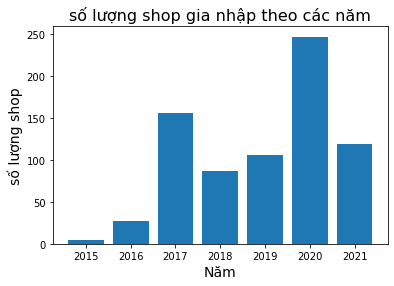

In [16]:
#Vẽ biểu đồ so sánh số lượng shop gia nhập theo các năm.
df2=df.pivot_table('shopid',index='join_year',aggfunc='count')
df2.index
plt.bar(df2.index, df2['shopid'])
plt.title('số lượng shop gia nhập theo các năm', fontsize = 16)
plt.xlabel('Năm', fontsize = 14)
plt.ylabel('số lượng shop', fontsize = 14)
plt.show()

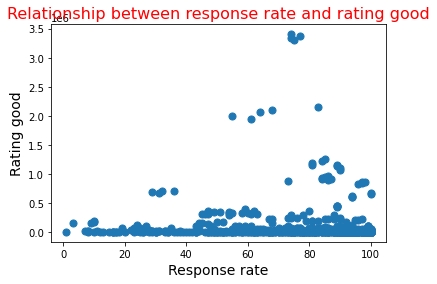

In [17]:
#Vẽ biểu đồ thể hiện mối quan hệ giữa tỉ lệ phản hồi với số lượt khách hàng đánh giá tốt.
plt.scatter(df['response_rate'],df['rating_good'], s = 50)
plt.title('Relationship between response rate and rating good', fontsize = 16, color = 'r')
plt.xlabel('Response rate', fontsize = 14)
plt.ylabel('Rating good', fontsize = 14)
plt.show()

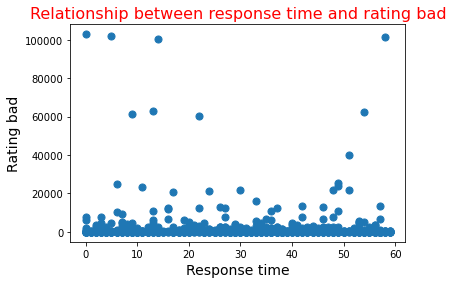

In [18]:
#Vẽ biểu đồ thể hiện mối quan hệ giữa thời gian phản hồi (đơn vị giây) với số lượt khách hàng đánh giá xấu.
df['Second']=pd.to_datetime(df['response_time'],format=' %H:%M:%S').dt.second
plt.scatter(df['Second'],df['rating_bad'], s = 50)
plt.title('Relationship between response time and rating bad', fontsize = 16, color = 'r')
plt.xlabel('Response time', fontsize = 14)
plt.ylabel('Rating bad', fontsize = 14)
plt.show()

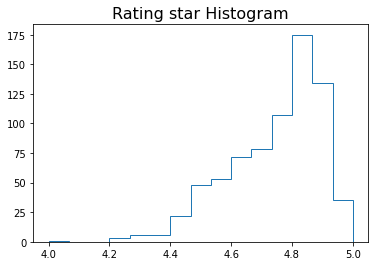

In [23]:
#Vẽ biểu đồ thể hiện phân bố của điểm đánh giá trung bình. 
plt.hist(df['rating_star'], bins = 15, range = (4, 5), histtype = 'step')
plt.title('Rating star Histogram', fontsize = 16)
plt.show()